In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial as sfactorial
from copy import copy
from time import time
%matplotlib inline

# Part 2.5 - Lists vs Numpy Arrays

Okay, within Python, we have different types.  For example 

In [3]:
x = 1
y = 1.
z = "Hi"

xlist = [1,2,3]
ylist = [1.,2.,3.]
zlist = ["Hi","Howdy","Hello"]

print(type(x))
print(type(y))
print(type(z))
print()
print(type(xlist))
print(type(ylist))
print(type(zlist))
print()
print(type(xlist[0]))
print(type(ylist[0]))
print(type(zlist[0]))

<class 'int'>
<class 'float'>
<class 'str'>

<class 'list'>
<class 'list'>
<class 'list'>

<class 'int'>
<class 'float'>
<class 'str'>


But since this is a scientific computation class, we have another type.  It is the NumPy Array.  You have seen this before with the command `np.linspace`.  In more detail, when we write the assignment statement
`
xvals = np.linspace(a,b,n)
`

we create an array of points `xvals[j]` such that 

`
xvals[j] = a + (b-a)*j/(n-1), j=0,...,n-1.
`

Now, this part is important.  Note that 

In [4]:
xvals = np.linspace(-2.,2.,int(1e1)+1)

print(type(xvals))

<class 'numpy.ndarray'>


So a NumPy array really is not just a Python list.  And the difference is huge.  In NumPy, I can do arithmetic on arrays.  I cannot do arithmetic on Python lists.  Let me show you what I mean.

In [5]:
print(type(xvals-xvals))
print(type(list(xvals)))
print(type(np.array(list(xvals))))
print(type(list(xvals)-list(xvals)))

<class 'numpy.ndarray'>
<class 'list'>
<class 'numpy.ndarray'>


TypeError: unsupported operand type(s) for -: 'list' and 'list'

# Part 3 - Loops and Iteration 

## While Loops and Log Plots

So, now that we have put some math under our proverbial belts, lets think about how to use Python to implement much of what we have been studying.  To do this we need to make use of what are called while and for loops.  We have already seen these, but let's now think about them in more detail.  Roughly speaking, the difference is that while loops go until something is no longer true.  For example 

In [6]:
count = 1
while count<=5: 
    print("Hello World")
    count += 1

Hello World
Hello World
Hello World
Hello World
Hello World


Statements like 

`count = count + 1`

are usually shortened to 

`count+=1`

so 

In [7]:
count = 1
while count<=5: 
    print("Hello World")
    count+=1

Hello World
Hello World
Hello World
Hello World
Hello World


So, let's say we wanted to compute the Taylor series around $x_{0}=0$ of $e^{x}$, which is given by 

$$
e^{x} = \sum_{j=0}^{\infty} \frac{x^{j}}{j!}.
$$

The idea here is to keep adding terms until a term, say $x^{j}/j!$ is, in magnitude, smaller than some specified tolerance, say `tol`.  In otherwords

`while np.abs(aj) >= tol: keep doing stuff`

Here the variable `aj` stands for $x^{j}/j!$.  The variable `tol` is the value we use to determine whether a given term is too small in order to keep iterating. 

To keep going, we note that if we write 

$$
e^{x} = \sum_{j=0}^{\infty}a_{j}(x),
$$

then we see that 

$$
\frac{a_{j}(x)}{a_{j-1}(x)} = \frac{x}{j},
$$

or 

$$
a_{j}(x) = \left\{
\begin{array}{rl}
\frac{x}{j} a_{j-1}(x) & j\geq 1\\
1 & j=0
\end{array}
\right.
$$

So, if put this all together, to make this work in Python, we write 

In [4]:
def exp_func(x,tol):
    tot = 1. # for the total you wish to return 
    aj = 1. # the terms you need to update
    jj = 1 # your counter
    while np.abs(aj)>=tol:
        aj *= x/jj
        tot += aj
        jj+=1 
        # what would you put here in order to update your term, total, and counter?
    return tot # what would you put here?

But how accurate is it?  Well let's compare our function to $e^{x}$ over $-2\leq x \leq 2$ for the tolerance values 

`
tol = 1e-5, 1e-6, 1e-7
`

Text(0, 0.5, '$e^{x}$')

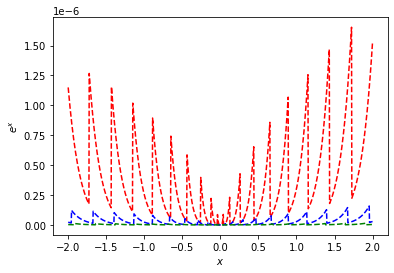

In [9]:
xvals = np.linspace(-2.,2.,int(1e3))
yvalst = np.exp(xvals)
yvals1 = np.array([exp_func(xval,1e-5) for xval in xvals])
yvals2 = [exp_func(xval,1e-6) for xval in xvals]
yvals3 = [exp_func(xval,1e-7) for xval in xvals]

#plt.plot(xvals,yvalst,color='k')
plt.plot(xvals,np.abs(yvalst-yvals1),color='r',ls='--')
plt.plot(xvals,np.abs(yvalst-yvals2),color='b',ls='--')
plt.plot(xvals,np.abs(yvalst-yvals3),color='g',ls='--')

plt.xlabel('$x$')
plt.ylabel('$e^{x}$')

Okay, that kind of helps us see a trend in behavior, but we can do better.  If you remember, 

$$
\log_{10}10^{-m} = -m
$$

then, if we are trying to plot errors on the order of $10^{-5},10^{-6},10^{-7}$, if we plotted 

`
e1 = np.log10(np.abs(yvalst - yvals1))
`

then we get 

Text(0, 0.5, '$log_{10}Error$')

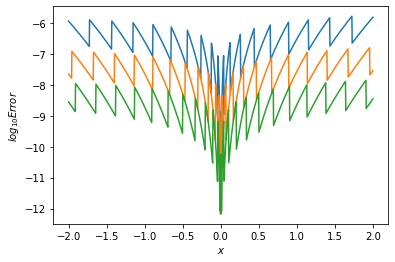

In [10]:
e1 = np.log10(np.abs(yvalst - yvals1))
e2 = np.log10(np.abs(yvalst - yvals2))
e3 = np.log10(np.abs(yvalst - yvals3))

# add code here 

plt.plot(xvals, e1)
plt.plot(xvals, e2)
plt.plot(xvals, e3)

plt.xlabel('$x$')
plt.ylabel('$log_{10}Error$')
# add code here 

Redo your error plots as semi-log plots.  

## For Loops

In contrast, a for loop starts at a point, and goes until another one.  So for example, if we create a list of words

In [11]:
hal = ["Hello","Dave,","would","you","like","to","play","a","game","of","chess?"]

How would we write code to print out each word.  Well, we could do it index by index.  What I mean by this is we could write 

In [14]:
print(hal[0])
print(hal[1])
print(hal[len(hal)-1])
print(hal[-1])
print(hal[-100])

Hello
Dave,
chess?
chess?


IndexError: list index out of range

Okay, you got me, I started getting bored.  But there are some important things to note here.  One, when we iterate over a list, we always start counting from `0`, thus why the _ first _ entry of the list `hal` is given by 

`hal[0]`

Now, this means that when we want to get to the last entry of the list, though the length of the list `hal` is given by 

`len(hal)`

the last entry is at an index that is one less than the total length.   

`hal[len(hal)-1]`

Now, if we want to print out the entries of `hal` we can use a for loop such as 

In [15]:
for jj in range(0,len(hal)):
    print(hal[jj])

Hello
Dave,
would
you
like
to
play
a
game
of
chess?


Ask yourself, does the index `jj` ever equal `len(hal)`?  Run the command 

In [ ]:
print(range(0,len((hal))))

and from this determine what `len(hal)` is.

In Python, we can alternatively iterate over values as opposed to indices of lists.  What I mean by this is we can write 

In [16]:
for word in hal: # Note, the variable 'word' is defined within the statement of the for loop. 
    print(word)

Hello
Dave,
would
you
like
to
play
a
game
of
chess?


This iteration by value is very convenient, and makes some things in Python really, really easy.  For example, what if we wanted to plot the step function $H(x)$ where 

$$
H(x) = \left\{
\begin{array}{rl}
1 & x\geq0 \\
-1 & x<0
\end{array}
\right.
$$

In [17]:
def step_func(x):
    if x>=0.:
        return 1.
    else:
        return -1.

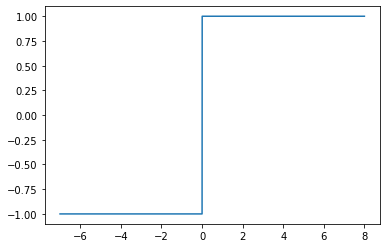

In [18]:
xvals = np.linspace(-7.,8.,int(1e4))
yvals = [step_func(xval) for xval in xvals] # Note use of list comprehension to generate range of function.

plt.plot(xvals,yvals)

## Vectorization in NumPy

We are now going to explore a key feature of NumPy which is _vectorization_.  This is a feature whereby instead of explicitly calling a loop, NumPy just knows to iterate over every entry of a NumPy array in some reasonable manner.  To get a feel for this, let's revisit our approximation for $\pi$ from the homework, where we used the code 

In [19]:
def pi_approx(n):
    tot = 0.
    nsq = n**2.
    for kk in range(0,int(n)+1):
        tot += np.sqrt(nsq-kk**2.)
    return 4.*tot/nsq

to represent the formula 

$$
\pi = \lim_{n\rightarrow\infty} \frac{4}{n^{2}}\sum_{k=0}^{n}\sqrt{n^{2}-k^{2}}
$$

And we know that works, but again note the explicit `for` loop.  To get far better performance, we make use of NumPy arrays to generate each What we see here is that if we could first generate all the entries in the sum and then sum along that array of entries, we could probably spare ourselves some grief.  This is exactly how vectorization in NumPy works.  To wit then, we use the following code 

In [20]:
def pi_approx_vec(n):
    kvals = np.arange(0,int(n)+1)
    nsq = n**2.
    tot = np.sum(np.sqrt(nsq*np.ones(int(n)+1) - kvals**2.))
    return 4.*tot/nsq

So note the appearance of the NumPy array `kvals` and the use of the `np.sum()` function, which adds up entries along an array.  Thus, we have written a version of the code that never calls a `for` explicitly.  What do we then get for our efforts? 

So, now let's think about how we can vectorize our function `exp_func` so that we can just pass one NumPy array `x`.  To make this work, we need to initialize our loops with  

`
tot = np.ones(x.size)
aj = np.ones(x.size)
`

which builds two NumPy arrays that are as long as `x`, and have entries equal to one.  Then, when we call 

`
aj *= x/j
`

which is equivalent to 

`
aj = aj*x/j
`

what is happening is that we multiply each entry of `aj` by each entry of the array `x/j`.  In other words, the above statement is equivalent to

`
for ll in range(0:x.size):
    aj[ll] *= x[ll]/j
`

but with vectorization, we do not explicitly call the `for` loop since NumPy understands to use it implicitly.  But then, how do we adjust our logic in our while loop so that we can work over an entire array of new terms `aj`?  This is where we need to make use of 

`while np.max(np.abs(aj))>=tol:`

but why?

In [22]:
start = time()
pi_approx_vec(1e7)
end=time()
print(end - start)

0.5726709365844727


In [21]:
start = time()
pi_approx(1e7)
end=time()
print(end - start)



KeyboardInterrupt: 

In [2]:
def exp_func_vec(x,tol):
    tot = np.ones(x.size) # for the total you wish to return 
    aj = np.ones(x.size) # the terms you need to update
    jj = 1 # your counter
    while np.max(np.abs(aj))>=tol:
        aj *= x/jj
        tot += aj
        jj += 1
        # what would you put here in order to update your term, total, and counter?
    return tot # what would you put here?

Time to run vectorized code was: 0.003059625625610
Time to run non-vectorized code was: 0.063902139663696


Text(0, 0.5, '$e^{x}$')

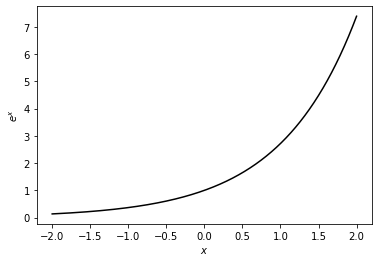

In [5]:
# You insert code which allows you to compare the performance of exp_func to exp_func_vec.  
# As a means of generating a test, use the array of x-values 

xvals = np.linspace(-2.,2.,int(1e3))

start = time()
evalsv = exp_func_vec(xvals,1e-9)
end = time()
tvec = end - start
print("Time to run vectorized code was: %1.15f" %tvec)

start = time()
evalsp = [exp_func(xval,1e-9) for xval in xvals]
end = time()
tvec = end - start
print("Time to run non-vectorized code was: %1.15f" %tvec)

plt.plot(xvals,evalsv,color='k')
plt.xlabel('$x$')
plt.ylabel('$e^{x}$')
# insert code here

So let's do something properly difficult to see how much we've learned.  If you dig in the depts of math, you will come up with a class of functions know as Bessel functions, denoted by $J_{n}(x)$.  These are usually _defined_ via a series where 

$$
J_{n}(x) = \sum_{j=0}^{\infty} \frac{(-1)^{j}}{j!(n+j)!}\left(\frac{x}{2}\right)^{n+2j}
$$

Given this definition, generate both non and vectorized, recursive code which allows you to compute $J_{n}(x)$ for any positive integer $n$ and any value of $x$.  Examine plots of your function to infer the behavior of the Bessel functions.  

In [ ]:
def bessel_func(x,n,tol):
    tot = #you put code here
    aj = tot
    j = 1
    x2 = #you put code here
    while #you put code here:
        aj *= #you put code here
        tot += #you put code here
        j += #you put code here
    return tot
    # add code here 

In [ ]:
def bessel_func_vec(x,n,tol):
    tot = #you put code here
    aj = copy(tot)
    j = 1
    x2 = #you put code here
    while #you put code here:
        aj *= #you put code here
        tot += #you put code here
        j += #you put code here
        
    return tot
    

In [ ]:
xvals = np.linspace(0.,40.,int(5e3))

plt.plot(xvals,bessel_func_vec(xvals,0,1e-8))

# provide timing comparisons between the non-vectorize and vectorized versions of your function

# plot you solution over the xvals above.  Add labels for the x and y axes.  